In [1]:
%load_ext autoreload
%autoreload 1

import binarygridsearch.binarygridsearch as bgs
%aimport binarygridsearch.binarygridsearch

import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.tree import _tree

In [2]:
#From here: https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html
def leaf_samples(tree, node_id = 0):
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]
    
    if left_child == _tree.TREE_LEAF:
        samples = np.array([tree.n_node_samples[node_id]])
        
    else:
        
        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)
        
        samples = np.append(left_samples, right_samples)
        
    return samples


In [3]:
def getForestParams(X, y, param, kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X, y)
    params = np.hstack([param(estimator.tree_) 
                 for estimator in clf.estimators_])
    return {"min": params.min(),
           "max": params.max()}

In [4]:
data = load_breast_cancer()
X, y = data.data, data.target

rfArgs = {"random_state": 0,
          "n_jobs": -1,
          "class_weight": "balanced",
         "n_estimators": 18,
         "oob_score": True}

In [5]:
getForestParams(X, y, leaf_samples, rfArgs)

{'max': 199, 'min': 1}

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

def auc_prc(estimator, X, y):
    estimator.fit(X, y)
    y_pred = estimator.oob_decision_function_[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred)
    return auc(recall, precision)

def getForestAccuracyCV(X, y, kwargs):
    clf = RandomForestClassifier(**kwargs)
    return np.mean(cross_val_score(clf, X, y, scoring=auc_prc, cv=5))

,min_samples_leaf,score,time,scoreTimeRatio
0,1,0.992414,1.040350,0.038312
1,199,0.002084,0.542641,0.000052
2,100,0.002084,0.592403,0.000039
3,51,0.002084,0.817436,0.000000
4,26,0.980393,0.631360,0.062430
5,14,0.995105,0.263413,0.152028
6,7,0.988716,0.881517,0.045065
7,10,0.998930,0.613618,0.065455
8,12,1.002084,0.040350,1.000000


,min_samples_leaf,score,time
0,1,0.981662,1.405569
1,199,0.506455,1.393235
2,100,0.506455,1.394468
3,51,0.506455,1.400045
4,26,0.975894,1.395433
5,14,0.982954,1.386315
6,7,0.979888,1.401633
7,10,0.984789,1.394994
8,12,0.986302,1.380786


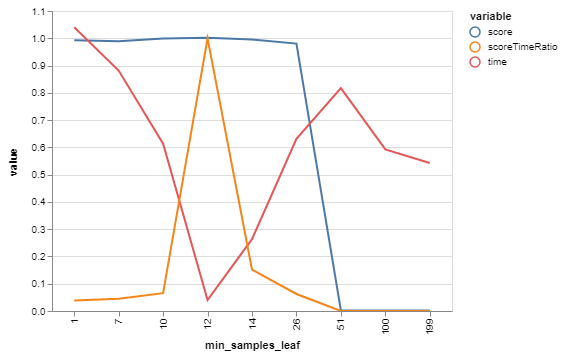

In [7]:
min_samples_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracyCV,        
                    rfArgs, 
                    "min_samples_leaf", 
                    0, 
                    1, 
                    199)
bgs.showTimeScoreChartAndGraph(min_samples_leaf)

,min_samples_leaf,score,time,scoreTimeRatio
0,1,0.992414,0.419546,0.066307
1,51,0.002084,0.039291,0.000000
2,26,0.980393,0.028070,1.000000
3,14,0.995105,0.282078,0.099636
4,7,0.988716,0.763508,0.035612
5,10,0.998930,0.881747,0.030965
6,12,1.002084,1.028070,0.026429


,min_samples_leaf,score,time
0,1,0.981662,1.414837
1,51,0.506455,1.401290
2,26,0.975894,1.400890
3,14,0.982954,1.409940
4,7,0.979888,1.427091
5,10,0.984789,1.431303
6,12,0.986302,1.436516


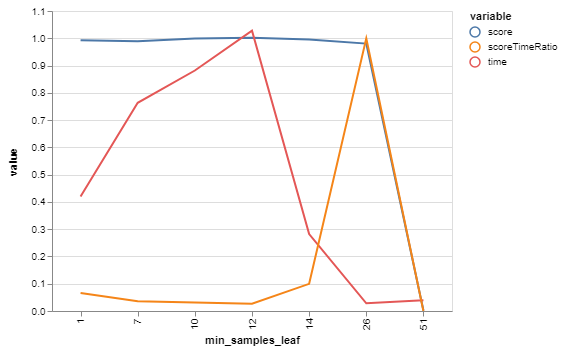

In [9]:
min_samples_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracyCV,        
                    rfArgs, 
                    "min_samples_leaf", 
                    0, 
                    1, 
                    51)
bgs.showTimeScoreChartAndGraph(min_samples_leaf)

,min_samples_leaf,score,time,scoreTimeRatio
0,1,0.650270,0.973749,0.146612
1,26,0.096077,0.126764,0.201213
2,14,0.774346,0.372936,1.000000
3,7,0.479788,1.126764,0.000000
4,10,0.950677,0.673260,0.597525
5,12,1.096077,0.676393,0.723800


,min_samples_leaf,score,time
0,1,0.981662,1.402538
1,26,0.975894,1.395857
2,14,0.982954,1.397799
3,7,0.979888,1.403746
4,10,0.984789,1.400168
5,12,0.986302,1.400193


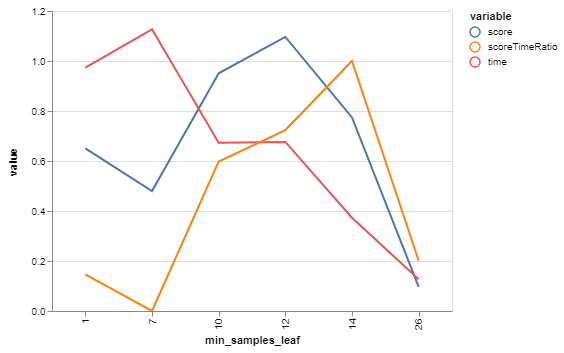

In [11]:
min_samples_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracyCV,        
                    rfArgs, 
                    "min_samples_leaf", 
                    0, 
                    1, 
                    26)
bgs.showTimeScoreChartAndGraph(min_samples_leaf)

,min_samples_leaf,score,time,scoreTimeRatio
0,1,0.751424,1.059590,0.000000
1,14,1.101193,0.509954,0.070340
2,7,0.270840,0.088111,0.114695
3,4,0.604895,0.595379,0.014882
4,3,1.270840,0.059590,1.000000


,min_samples_leaf,score,time
0,1,0.981662,1.411024
1,14,0.982954,1.401800
2,7,0.979888,1.394721
3,4,0.981121,1.403234
4,3,0.983580,1.394242


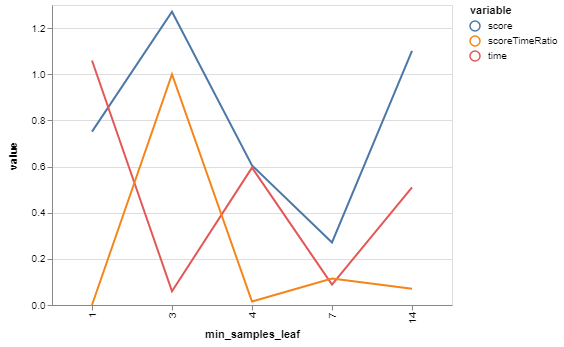

In [10]:
min_samples_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracyCV,        
                    rfArgs, 
                    "min_samples_leaf", 
                    0, 
                    1, 
                    14)
bgs.showTimeScoreChartAndGraph(min_samples_leaf)